In [2]:
# Cell 1 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
)

import re
import string
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [4]:
# Cell 2 - Load dataset
df = pd.read_csv('emails.csv')
print("Shape:", df.shape)
df.head()

Shape: (5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Drop the 'Email No.' column (not a useful feature)
df.drop(columns=['Email No.'], inplace=True)

# Separate features and target
X = df.drop(columns=['Prediction'])
y = df['Prediction']

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature shape: (5172, 3000)
Target distribution:
 Prediction
0    3672
1    1500
Name: count, dtype: int64


In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (4137, 3000)
Test size: (1035, 3000)


🔹 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       735
           1       0.74      0.85      0.79       300

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.87      1035



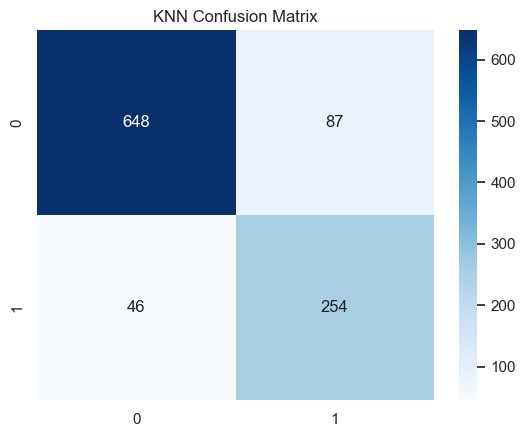

In [10]:
#K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

print("🔹 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

🔹 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       735
           1       0.94      0.95      0.94       300

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



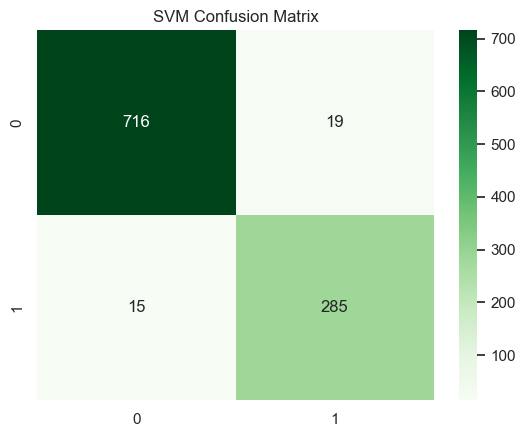

In [11]:
#Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_svm = roc_auc_score(y_test, y_pred_svm)

print("🔹 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.show()

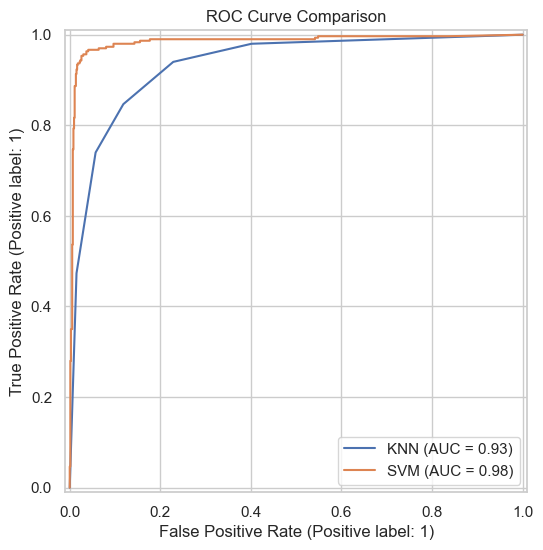

In [12]:
#ROC Curve Comparison
y_proba_knn = knn.predict_proba(X_test)[:, 1]
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_proba_knn, name='KNN', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_svm, name='SVM', ax=plt.gca())
plt.title('ROC Curve Comparison')
plt.show()

In [13]:
#Compare Models
results = pd.DataFrame({
    'Model': ['KNN', 'SVM (Linear)'],
    'Accuracy': [acc_knn, acc_svm],
    'Precision': [prec_knn, prec_svm],
    'Recall': [rec_knn, rec_svm],
    'F1 Score': [f1_knn, f1_svm],
    'ROC-AUC': [roc_knn, roc_svm]
})

print("🔹 Model Performance Comparison")
display(results)

🔹 Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,KNN,0.871498,0.744868,0.846667,0.792512,0.864150
1,SVM (Linear),0.967150,0.937500,0.950000,0.943709,0.962075


In [ ]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best SVM Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)